<a href="https://colab.research.google.com/github/bbk-rml/TradeMore/blob/main/TradeMore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Use of relative Strength Index(RSI) and python to determine if a stock is over sold (buy) and over bought (sell)

In [ ]:
#import the liabiries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()


Saving FB.csv to FB.csv


In [ ]:
#store the data
FB = pd.read_csv('FB.csv')

#show the data
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
...,...,...,...,...,...,...,...
246,2020-05-11,210.889999,215.000000,210.369995,213.179993,213.179993,12911900
247,2020-05-12,213.289993,215.279999,210.000000,210.100006,210.100006,14704600
248,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900


In [ ]:
#set the date as index for the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2019-05-20,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
2019-05-21,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2019-05-22,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
2019-05-23,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
2019-05-24,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
...,...,...,...,...,...,...,...
2020-05-11,2020-05-11,210.889999,215.000000,210.369995,213.179993,213.179993,12911900
2020-05-12,2020-05-12,213.289993,215.279999,210.000000,210.100006,210.100006,14704600
2020-05-13,2020-05-13,209.429993,210.779999,202.110001,205.100006,205.100006,20684600
2020-05-14,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900


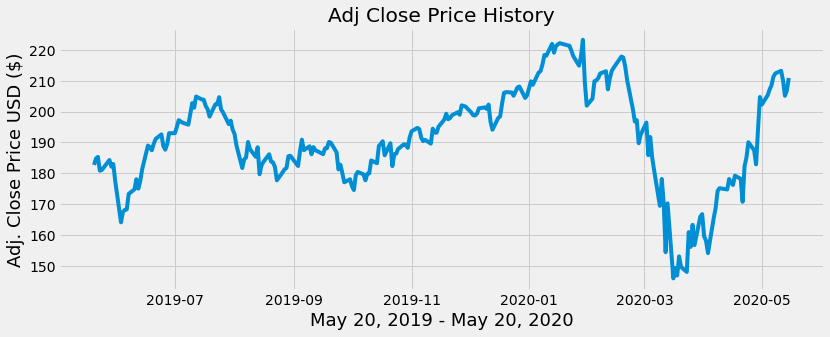

In [ ]:
#Visually Show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index, FB['Adj Close'], label = 'Adj Close Price')
plt.title('Adj Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#prepare the data to calculate the RSI

#Get the difference in Price from the previous day
delta = FB['Adj Close'].diff(1)
delta

2019-05-20         NaN
2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.450012
2019-05-24    0.190003
                ...   
2020-05-11    0.829987
2020-05-12   -3.079987
2020-05-13   -5.000000
2020-05-14    1.709992
2020-05-15    4.070007
Name: Adj Close, Length: 251, dtype: float64

In [ ]:
#Get rid of NaN
delta = delta.dropna()
delta

2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.450012
2019-05-24    0.190003
2019-05-28    3.250000
                ...   
2020-05-11    0.829987
2020-05-12   -3.079987
2020-05-13   -5.000000
2020-05-14    1.709992
2020-05-15    4.070007
Name: Adj Close, Length: 250, dtype: float64

In [ ]:
#Get the positive gains (up) and the negative gains(down)
up=delta.copy()
down=delta.copy()

up[up<0] = 0
down[down > 0] = 0



In [ ]:
#Get the time period
period = 14
#Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = down.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [ ]:
#Calculate The RSI

#Calculate the Relative Strength(RS)
RS = AVG_Gain / AVG_Loss

#Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

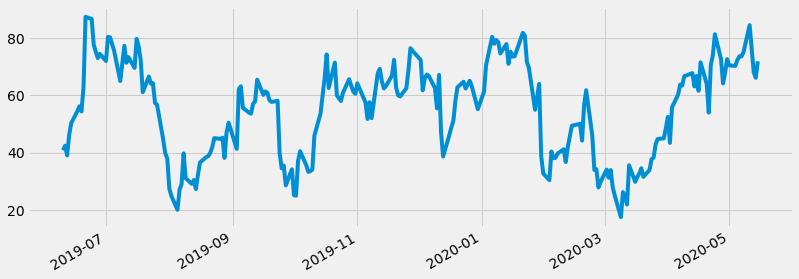

In [ ]:
#Show the RSI Visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [ ]:
#put it all together

#Create a new dara frame

new_df = pd.DataFrame()
new_df['Adj Close Price'] = FB['Adj Close']
new_df['RSI'] = RSI
new_df


,Adj Close Price,RSI
2019-05-20,182.720001,NaN
2019-05-21,184.820007,NaN
2019-05-22,185.320007,NaN
2019-05-23,180.869995,NaN
2019-05-24,181.059998,NaN
...,...,...
2020-05-11,213.179993,84.410514
2020-05-12,210.100006,76.156460
2020-05-13,205.100006,68.046273
2020-05-14,206.809998,66.065258


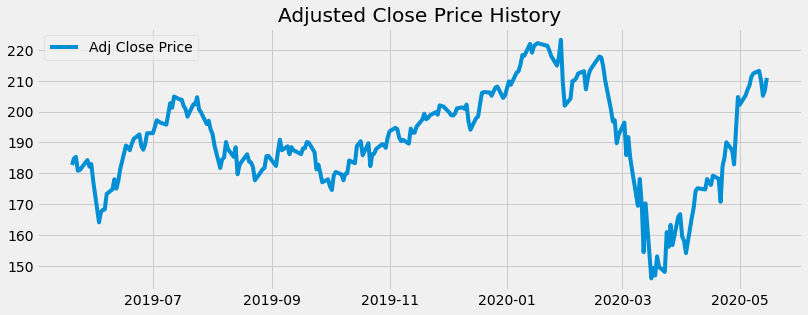

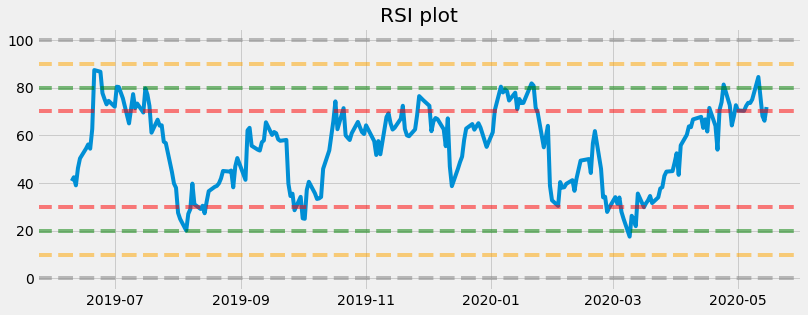

In [ ]:
#Visually show the adjusted Close price and RSI

#plot the Adjusted Close Price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adjusted Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

#plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
plt.show()

